In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

### Loading PIV vector field files (in .h5):

In [1]:
# # Check out the data information, containing datasets. 
# with h5py.File(filepath, 'r') as h5file:
#     for dataset_name in h5file:
#         print(f"Dataset Name: {dataset_name}")
#         # Access dataset attributes, metadata, or data if needed
#         # data = h5file[dataset_name][:]

In [3]:
# Opening PIV result vector field. 
with h5py.File("F:/PhD_Franziska/Headon/memGFP/memGFP_DAPT/DAPT_PIV_step=8_intersize=16/memGFP_DAPT_PIV.h5", "r") as file:
    U = file["U"][:]
    V = file["V"][:]
    M = file["M"][:]
    xgrid = file["xgrid"][:]
    ygrid = file["ygrid"][:]

In [7]:
# # Tissue image data.
# with h5py.File("F:/PhD_Franziska/Headon/memGFP/memGFP_DAPT/memGFP_DAPT_tissue.h5", "r") as file:
#     tissue = file["img"][:]

# Visualization of original tissue video

In [29]:
# fig = plt.figure(figsize = (5, 5), dpi=300)

# def make_frame(i):
#     plt.clf()
#     # Plotting.
#     plt.title("t="+str(i))
#     plt.imshow(tissue[i].T)
#     print("tu")

# myanim = FuncAnimation(fig, make_frame, frames = len(U)-1, interval = 500)
# myanim.save("memGFP_control_only_tissue.mp4", writer="ffmpeg")

# Visualization of original PIV results

tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu
tutu


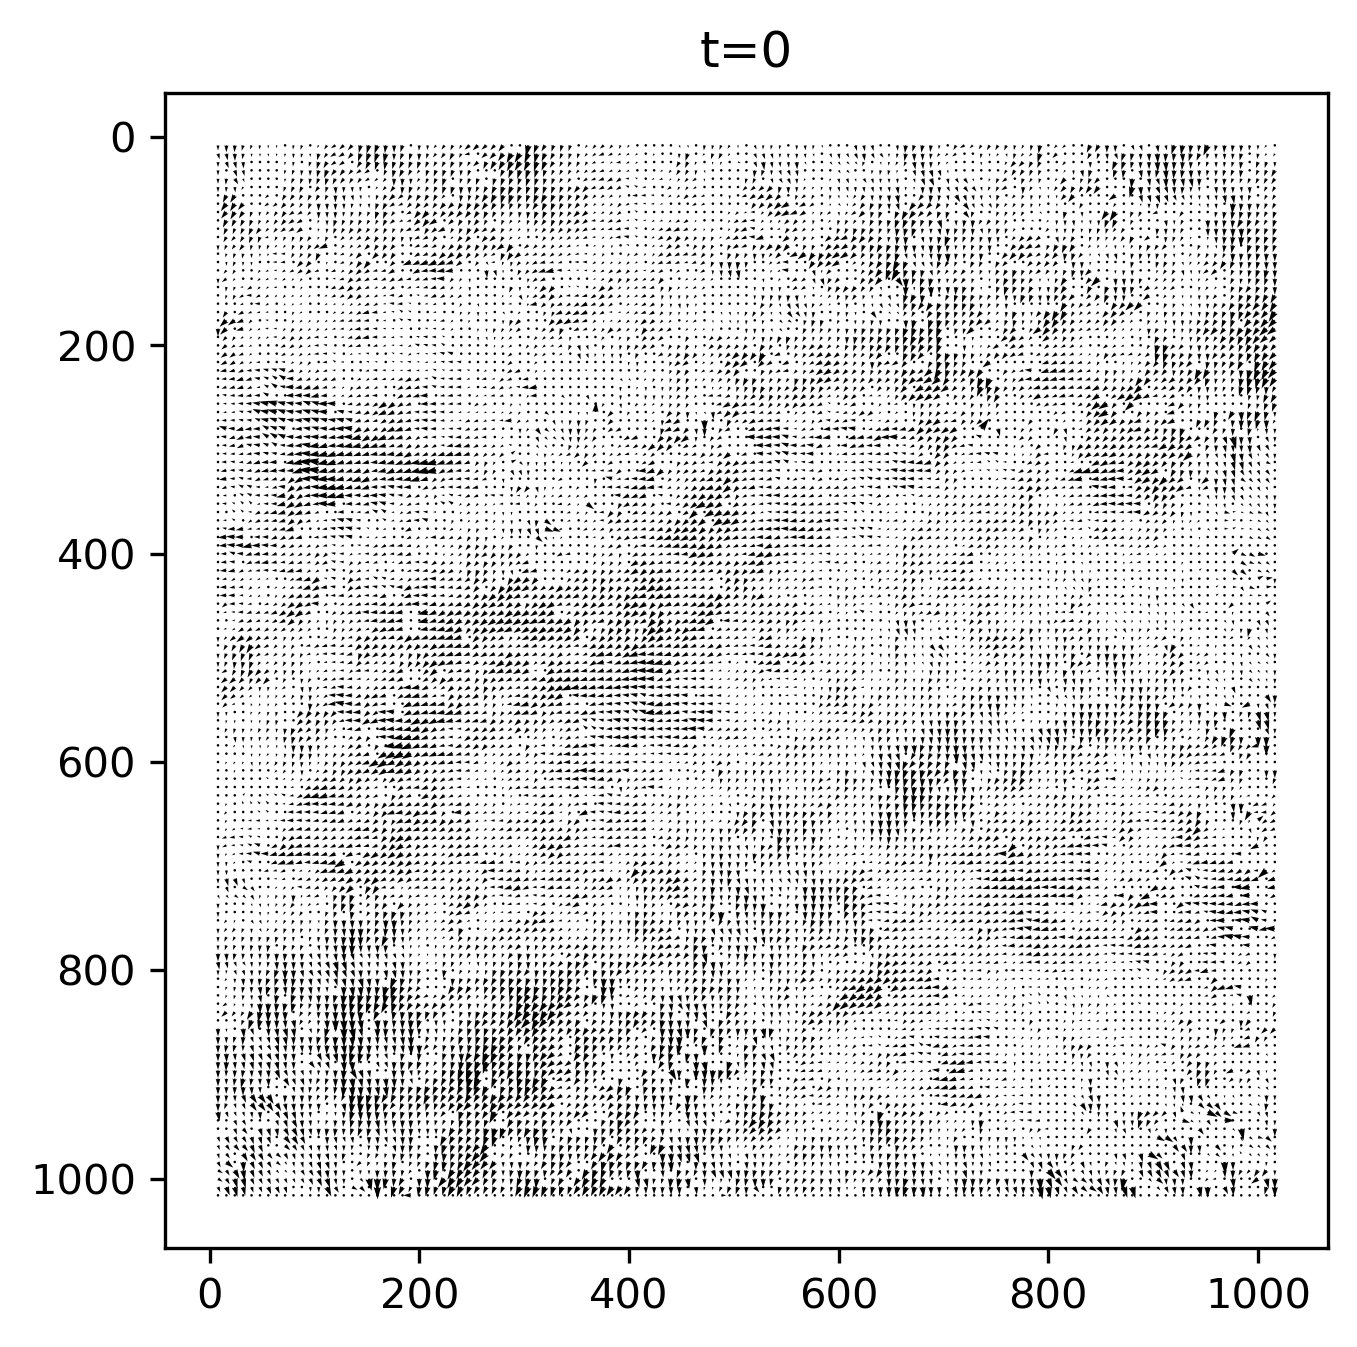

In [7]:
fig = plt.figure(figsize = (5, 5), dpi=300)
x = xgrid[0]
y = ygrid[0]

def make_frame(i):
    plt.clf()
    # Plotting.
    plt.title("t="+str(i))
    #plt.imshow(slices[i].T)
    plt.quiver(x, y, V[i], -U[i]) # If nescessary use scale to rescale the arrow representation.
    plt.gca().invert_yaxis()
    print("tutu")

myanim = FuncAnimation(fig, make_frame, frames = len(U)-1, interval = 500)
myanim.save("memGFP_DAPT_only_PIV_vec.mp4", writer="ffmpeg")

# Averaging of vector fields over sliding time intervals (sliding window)

In [8]:
def vector_avg(U, V, M, t, interval):
    # Compute the averaging vectors and their magnitudes at time t. 
    # U, V and M are the total data sets. 
    # Interval determins the averaging interval before and after t.

    if t < interval:
        U_mid = np.median(U[0 : t+interval+1], axis = 0)
        V_mid = np.median(V[0 : t+interval+1], axis = 0)
        # U_mid = np.mean(U[0:t+interval+1], axis = 0)
        # V_mid = np.mean(V[0:t+interval+1], axis = 0)
        print("1")
    elif len(U)-t < interval:
        U_mid = np.median(U[t-interval : len(U)+1], axis = 0)
        V_mid = np.median(V[t-interval : len(U)+1], axis = 0)
        # U_mid = np.mean(U[t-interval:len(U)+1], axis = 0)
        # V_mid = np.mean(V[t-interval:len(U)+1], axis = 0)
        print("2")
    else:
        U_mid = np.median(U[t-interval : t+interval+1], axis = 0)
        V_mid = np.median(V[t-interval : t+interval+1], axis = 0)
        # U_mid = np.median(U[t-interval : t+interval+1], axis = 0)
        # V_mid = np.median(V[t-interval : t+interval+1], axis = 0)
        print("3")

    # Update the M (magnitude matrix)
    M_mid = np.sqrt(U_mid**2 + V_mid**2)
        
    return U_mid, V_mid, M_mid

## Filter out the extra long vectors
Depending on the vector length how many times of std above the mean length. 

In [11]:
# def postprocess(U, V, M, std_factor):
#     # Defining the mask.
#     meanM = np.mean(M)
#     stdM = np.std(M)
#     mask = M < meanM + std_factor * stdM
#     M *= mask
#     # filter the U, V vector components depending on masked M.
#     # U[M == 0] = "nan"
#     # V[M == 0] = "nan"
#     return U, V, M

## Firstly averaging then postprocessing. Make video.

### Only vectors

1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1


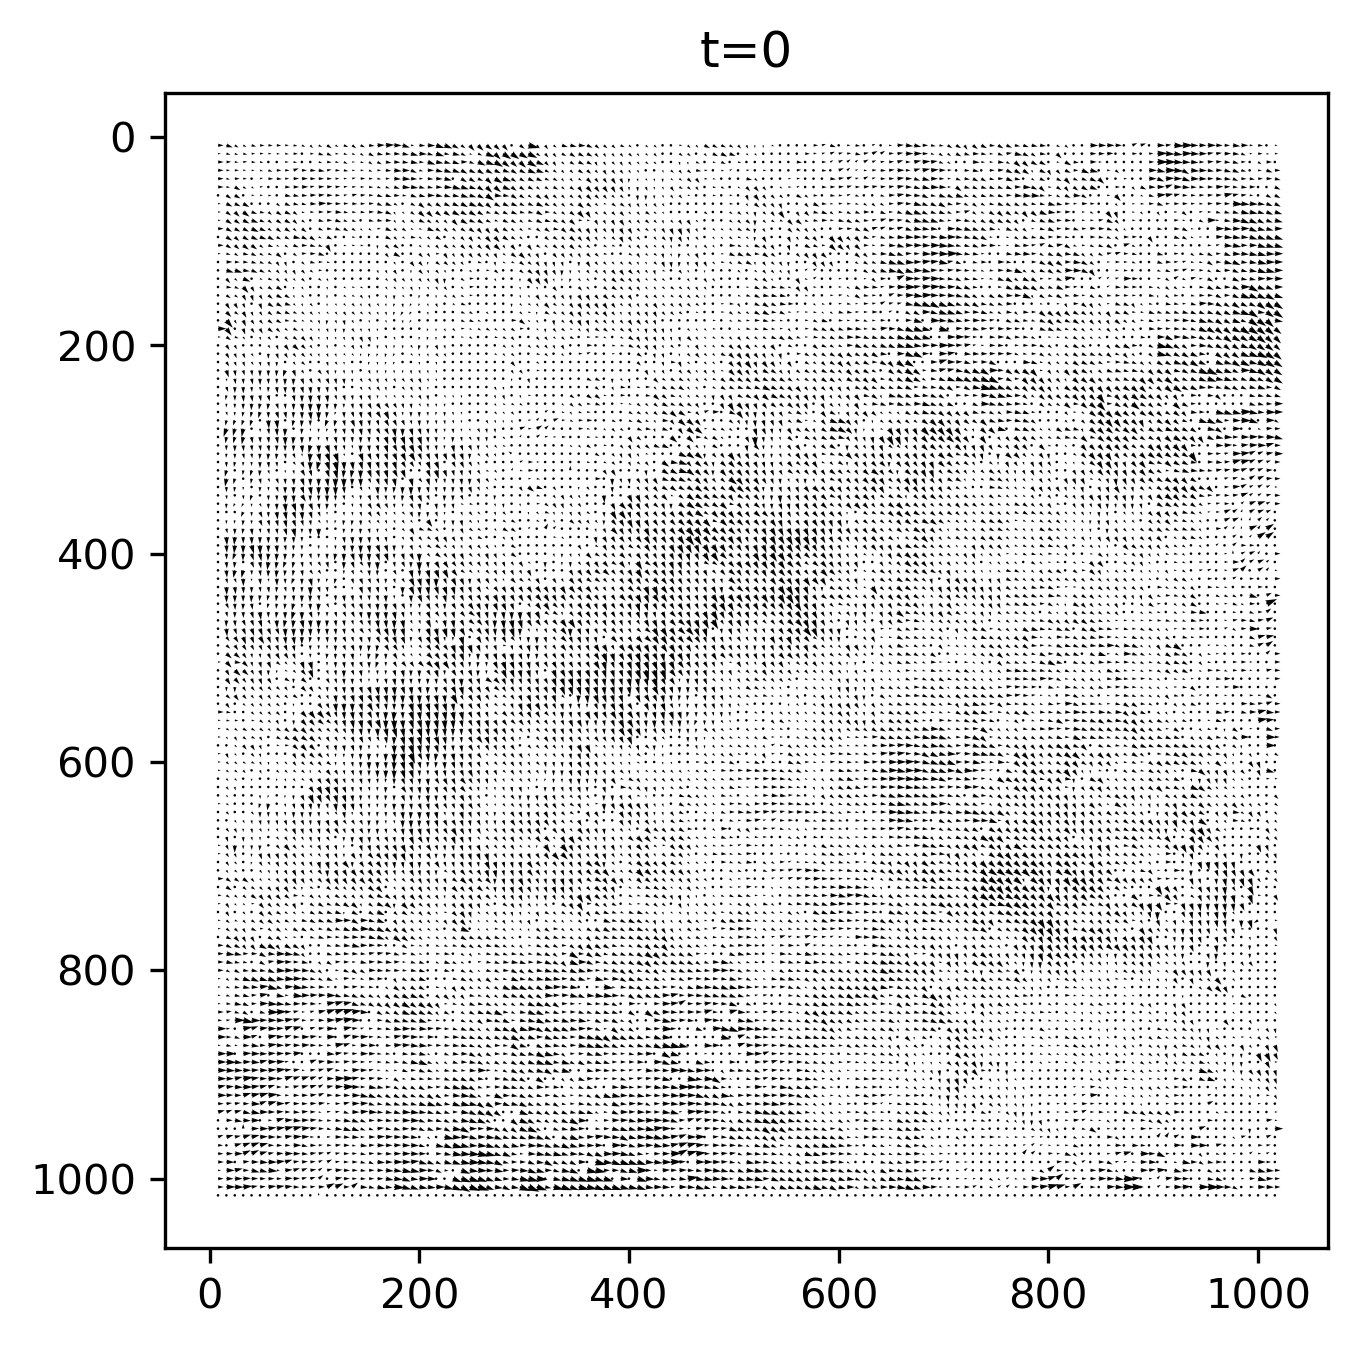

In [9]:
fig = plt.figure(figsize = (5, 5), dpi=300)
x = xgrid[0]
y = ygrid[0]

def make_frame(i):
    plt.clf()
    # Averaging (after the space averaging)
    U_avg, V_avg, M_avg = vector_avg(U, V, M, i, 2) 
    # Plotting.
    plt.title("t="+str(i))
    plt.quiver(x, y, U_avg, V_avg)
    plt.gca().invert_yaxis()

myanim = FuncAnimation(fig, make_frame, frames = len(U)-1, interval = 500)
myanim.save("memGFP_DAPT_PIV_after_time_smoothing.mp4", writer="ffmpeg")

## Write the U, V, M in h5 files.
Remember to synchronize the averaging interval as above. 

In [10]:
m_U = []
m_V = []
m_M = []

for i in range(len(U)):
    # Averaging
    U_avg, V_avg, M_avg = vector_avg(U, V, M, i, 2)
    # Postprocessing.
    #U_post, V_post, M_post = postprocess(U_avg, V_avg, M_avg, 3)
    m_U.append(U_avg)
    m_V.append(V_avg)
    m_M.append(M_avg)

# Write into h5 file.
U_avg = h5py.File("U_avg.h5", "w")
U_avg.create_dataset("matrix", data = m_U)
U_avg.close()

V_avg = h5py.File("V_avg.h5", "w")
V_avg.create_dataset("matrix", data = m_V)
V_avg.close()

M_avg = h5py.File("M_avg.h5", "w")
M_avg.create_dataset("matrix", data = m_M)
M_avg.close()

1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
